In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import re

In [29]:
train_data=pd.read_excel('C:\\Users\\Awadhesh\\dataset1\\Final_Train.xlsx')

In [30]:
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [31]:
test_data=pd.read_excel('C:\\Users\\Awadhesh\\dataset1\\Final_Test.xlsx')

In [32]:
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [33]:
train_data.shape, test_data.shape

((5961, 7), (1987, 6))

In [34]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
Qualification         5961 non-null object
Experience            5961 non-null object
Rating                2659 non-null object
Place                 5936 non-null object
Profile               5961 non-null object
Miscellaneous_Info    3341 non-null object
Fees                  5961 non-null int64
dtypes: int64(1), object(6)
memory usage: 186.3+ KB


In [35]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Fees,5961.0,307.94464,190.920373,5.0,150.0,300.0,500.0,950.0


In [36]:
# Missing data
train_data.isna().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Pre-process Data

In [37]:
train_data['Experience_Yrs'] = train_data.Experience.map(lambda x : re.search('\d+', x).group())
train_data['Experience_Yrs'] = pd.to_numeric(train_data['Experience_Yrs'])
train_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Experience_Yrs
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,24
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,12
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,9
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,12
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,20


In [38]:
test_data['Experience_Yrs'] = test_data.Experience.map(lambda x : re.search('\d+', x).group())
test_data['Experience_Yrs'] = pd.to_numeric(test_data['Experience_Yrs'])
test_data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Experience_Yrs
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,35
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,31
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",40
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,0
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,16


In [39]:
train_data.Profile.value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [40]:
train_data['Qualification_1'] = train_data.Qualification.map(lambda x : re.split(',', x)[0]).str.strip()
train_data['Qualification_1'] = train_data['Qualification_1'].str.split(' ').str[0].str.replace("[^a-zA-Z0-9]+",'').str.lower()
(train_data.Qualification_1.unique())

array(['bhms', 'bams', 'mbbs', 'bsc', 'bds', 'mds', 'diploma', 'dm', 'md',
       'mdsoral', 'get', 'phd', 'mrcps', 'ms', 'ddvl', 'dhms', 'gceh',
       'post', 'dnb', 'certification', 'fellowship', 'fage', 'bsam',
       'fnb', 'certificate', 'certified', '39', 'lceh', 'doctor',
       'diplomate', 'msc', 'advanced', 'fcps', 'gams', 'bums', 'mba',
       'training', 'pg', 'mch', 'ddv', 'bems', 'mrcs', 'ma', 'mph',
       'graduate', 'mrcpch', 'frcs', 'bac', 'bims', 'dvd', 'ayurvedic',
       'dhm', 'member', 'mrcgp', 'mrcp', 'cgo', 'pgd', 'dnhe',
       'doctorate', 'frguhs', 'm', 'frcp', 'cochlear', 'masters', 'pdcc',
       'ffdrcsi', 'mddvl', 'dgo'], dtype=object)

In [41]:
test_data['Qualification_1'] = test_data.Qualification.map(lambda x : re.split(',', x)[0]).str.strip()
test_data['Qualification_1'] = test_data['Qualification_1'].str.split(' ').str[0].str.replace("[^a-zA-Z0-9]+",'').str.lower()
test_data.Qualification_1.unique()

array(['mbbs', 'bams', 'bds', 'md', 'bhms', 'ms', 'bsc', 'fellowship',
       'mds', 'lceh', 'dm', 'post', 'certificate', 'dvd', 'ddvl', 'dnb',
       'doctor', 'dhms', 'frcp', 'diploma', 'bsam', 'get', 'do', 'frcs',
       'fwfo', 'dms', 'mddvl', 'bpthbpt', 'fams', 'phd', 'ficd', 'dehm',
       'mrcgp', 'fpfa', 'mrcs', 'mrcp', 'certification', 'dpm'],
      dtype=object)

In [42]:
test_data[~test_data.Qualification_1.isin(train_data.Qualification_1.unique())]['Qualification_1'].count()

9

In [43]:

## Qualification
train_data['Qualification_2'] = train_data.Qualification.map(lambda x : re.split(',', x)[1] if x.count(',')>0 else 'NO_QUAL').str.strip()
train_data['Qualification_2'] = train_data['Qualification_2'].str.split(' ').str[0].str.strip().str.replace("[^a-zA-Z0-9]+",'').str.lower()
train_data.Qualification_2.unique()

array(['md', 'ms', 'bams', 'noqual', 'bds', 'mds', 'diploma', 'mf', 'dnb',
       'fellowship', 'ddvl', 'ibclc', 'mbbs', 'afih', 'm', 'dhms',
       'member', 'certificate', 'ddv', 'venereology', 'post', 'pgd',
       'morth', 'frcp', 'pg', 'msc', 'certification', 'mrcpch', 'frguhs',
       'mfds', 'dgo', 'dvd', 'bhms', 'phd', 'dm', 'mrcgp', 'postgraduate',
       'dpm', 'fage', 'division', 'fcps', 'masters', 'mcpuclausa', 'mrcp',
       'mba', 'dorl', 'ayurvedic', 'pghomlondon', 'cgo', 'do', 'mcip',
       'mdsoral', 'fcah', 'bpthbpt', 'pgnahi', 'ficd', 'bnys', 'dlo',
       'bsc', 'one', 'vd', 'fellow', 'mmed', 'diachgreece', 'mnams',
       'mrcs', 'comprehensive', 'pgcad', 'dya', 'mrcps', 'dnhe', 'pgcr',
       'certified', 'pgdhhm', 'mch', 'advanced', 'master', 'fcip', 'fcd',
       'dems', 'ma', 'lceh', 'ccedm', 'ccebdm', 'singapore', 'dortho',
       'basic', 'advance', 'pgde', 'bems', 'facc', 'fams', 'fsrh',
       'mfgdp', 'invisalign', 'pcad', 'frcs', 'pgdha', 'distance', 'dm

In [44]:
## Qualification
test_data['Qualification_2'] = test_data.Qualification.map(lambda x : re.split(',', x)[1] if x.count(',')>0 else 'NO_QUAL').str.strip()
test_data['Qualification_2'] = test_data['Qualification_2'].str.split(' ').str[0].str.strip().str.replace("[^a-zA-Z0-9]+",'').str.lower()
test_data.Qualification_2.unique()

array(['noqual', 'diploma', 'ddvl', 'mds', 'bams', 'fcd', 'ddv', 'md',
       'pg', 'mbbs', 'ms', 'phd', 'lceh', 'dgo', 'dm', 'dnb',
       'fellowship', 'bds', 'pgcr', 'frcs', 'postgraduate', 'mrcoguk',
       'fellow', 'yoga', 'pgdpc', 'pgd', 'mba', 'membership', 'pgdhhm',
       'mnams', 'certificate', 'doctor', 'venereology', 'post',
       'advanced', 'ficd', 'mrcps', 'dvd', 'dhms', 'ph', 'bhms', 'csd',
       'mch', 'fica', 'facc', 'fpfa', 'dlo', 'msc', 'implant', 'dnhe',
       'm', 'masters', 'mdsoral', 'pgdha', 'certification', 'dorl',
       'bsam', 'bsc', 'cgo', 'professional', 'frcp', 'dd', 'master',
       'doms', 'mmed', 'mrcgp', 'pgcad', 'fcps', 'panchkarma', 'dpm',
       'mdayurvedic', 'afih', 'dvl', 'mphil', 'bems', 'dph', 'graduate',
       'fdiab', 'fccp', 'pgdhsc', 'dpharm'], dtype=object)

In [45]:
test_data[~test_data.Qualification_2.isin(train_data.Qualification_2.unique())]['Qualification_2'].count()

18

In [46]:
train_data['Qualification_Total'] = train_data.Qualification.map(lambda x : x.count(',')+1)
train_data.Qualification_Total.value_counts()

2     2628
1     1962
3      995
4      257
5       84
6       23
7        6
9        3
8        2
10       1
Name: Qualification_Total, dtype: int64

In [47]:
test_data['Qualification_Total'] = test_data.Qualification.map(lambda x : x.count(',')+1)
test_data.Qualification_Total.value_counts()

2     889
1     609
3     366
4      87
5      28
6       5
17      1
9       1
7       1
Name: Qualification_Total, dtype: int64

In [48]:
train_data['Town'] = train_data.Place.str.split(',').str[0].str.strip(' ').str.replace("[^a-zA-Z0-9]+",'').str.lower()
train_data['Town'].value_counts().head()

hsrlayout       75
andheriwest     70
dwarka          68
banjarahills    64
mulundwest      54
Name: Town, dtype: int64

In [49]:
test_data['Town'] = test_data.Place.str.split(',').str[0].str.strip(' ').str.replace("[^a-zA-Z0-9]+",'').str.lower()
test_data['Town'].value_counts().head()

mulundwest     27
andheriwest    27
dwarka         26
whitefield     23
hsrlayout      22
Name: Town, dtype: int64

In [50]:

test_data[~test_data.Town.isin(train_data.Town.unique())]['Town'].count()

83

In [51]:
train_data['City'] = train_data.Place.str.split(',').str[1].str.strip().str.replace("[^a-zA-Z0-9]+",'').str.lower()
train_data['City'].value_counts().head()

bangalore    1258
mumbai       1219
delhi        1184
hyderabad     951
chennai       855
Name: City, dtype: int64

In [52]:
test_data['City'] = test_data.Place.str.split(',').str[1].str.strip().str.replace("[^a-zA-Z0-9]+",'').str.lower()
test_data['City'].value_counts().head()

bangalore    420
delhi        417
mumbai       389
hyderabad    333
chennai      287
Name: City, dtype: int64

In [53]:

test_data[~test_data.City.isin(train_data.City.unique())]['City'].count()

0

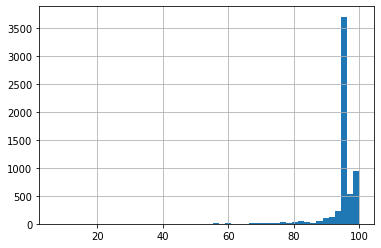

In [54]:
train_data['Rating_Present'] = train_data["Rating"].notnull().astype('int')
test_data['Rating_Present'] = test_data["Rating"].notnull().astype('int')

train_data['Rating_Val'] = train_data.Rating.str.strip('%')
train_data['Rating_Val'] = pd.to_numeric(train_data['Rating_Val'])
train_rating_mean = train_data['Rating_Val'].mean()
train_data['Rating_Val'] = train_data['Rating_Val'].fillna(train_rating_mean)
train_data['Rating_Val'].hist(bins=50)
plt.show()

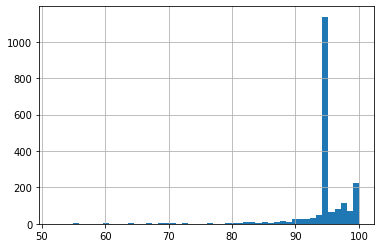

In [55]:
# Rating
test_data['Rating_Val'] = test_data.Rating.str.strip('%')
test_data['Rating_Val'] = pd.to_numeric(test_data['Rating_Val'])
test_data['Rating_Val'] = test_data['Rating_Val'].fillna(train_rating_mean)
test_data['Rating_Val'].hist(bins=50)
plt.show()

In [56]:

train_data['Rating_Val'] = train_data['Rating_Val']/100
test_data['Rating_Val'] = test_data['Rating_Val']/100

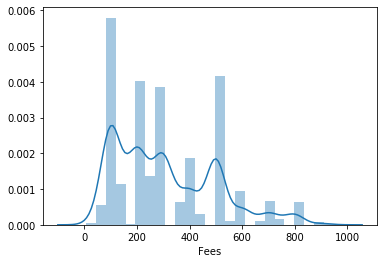

In [57]:

sns.distplot(train_data['Fees'])
plt.show()

In [58]:
features_1 = ['Experience_Yrs', 'Qualification_Total', 'Rating_Present']
features_2 = ['City', 'Profile', 'Qualification_1', 'Qualification_2', 'Town']
features_X = features_1 + features_2

In [59]:
#train_data_2 = pd.get_dummies((train_data[features_2]).astype(str))
# Concat with keys then get dummies
temp = pd.get_dummies(pd.concat([train_data[features_2], test_data[features_2]],keys=[0,1]), columns=features_2)

# Selecting data from multi index and assigning them i.e
train_data_2, test_data_2 = temp.xs(0),temp.xs(1)
train_data_2.shape, test_data_2.shape

((5961, 1176), (1987, 1176))

In [61]:
# Add multi-degree polynomials. THIS IS NOT USED IN MODEL
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=10)
train_data_3 = poly.fit_transform(train_data[features_1])
train_data_3 = pd.DataFrame.from_records(train_data_3)

In [70]:
train_X = pd.concat([train_data[features_1], train_data_2], axis=1)
train_X.shape

(5961, 1179)

In [71]:
train_y = train_data['Fees']
train_y.shape

(5961,)

In [72]:
test_X = pd.concat([test_data[features_1], test_data_2], axis=1)
test_X.shape


(1987, 1179)

In [73]:
def rmsle_score(y, y0):
    return (1 - np.sqrt(np.mean(np.square(np.log(y) - np.log(y0)))))

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_X, train_y)
predictions = lin_reg.predict(train_X)
lin_score = rmsle_score(train_y, predictions)
lin_score

0.43292432296585515

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

from sklearn.linear_model import Lasso
lasso = Lasso()

from sklearn.linear_model import ElasticNet
ela_net = ElasticNet()

from sklearn.linear_model import Ridge
ridge = Ridge()

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(splitter='random', max_features='auto')

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100)

from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')

from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')

from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(learning_rate=0.5, n_estimators=500, max_depth=11, loss='huber')

from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor()

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=50, weights='distance', p=1)

In [75]:
model_name, model_score = [], []
models = [tree, forest, knn_reg, svr_rbf, gbr]
for _reg_model in models:
    _reg_model.fit(train_X, train_y)
    predictions = _reg_model.predict(train_X)
    #score = rmsle_score(train_y, predictions)
    #score = np.sqrt(mean_squared_error(train_y, predictions))
    score = 1 - np.sqrt(mean_squared_log_error(train_y, predictions))
    print(_reg_model.__class__.__name__,  ":", score)
    model_name.append(_reg_model.__class__.__name__)
    model_score.append(score)

DecisionTreeRegressor : 0.9378280156964934
RandomForestRegressor : 0.7250666180002143
KNeighborsRegressor : 0.9464218588195445
SVR : 0.31432806062080276
GradientBoostingRegressor : 0.9042394453315789


In [76]:
# GridSearchCV to find optimal parameters on KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights' : ['uniform', 'distance'], 'n_neighbors' : [2,3,5,10,30,50,100,150],
               'p' : [1,2]
              }]

reg = KNeighborsRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_log_error')
grid_search.fit(train_X, train_y)

print("grid_search.best_params_ =", grid_search.best_params_)
print("grid_search.best_score_ =", 1 - np.sqrt(-1*grid_search.best_score_))

grid_search.best_params_ = {'n_neighbors': 30, 'p': 1, 'weights': 'distance'}
grid_search.best_score_ = 0.36084157991289356


In [43]:
# GridSearchCV to find optimal parameters on DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [{'splitter' : ['best', 'random'], 'max_features' : ['auto', 'sqrt', 'log2']
              }]

reg = DecisionTreeRegressor()
grid_search = GridSearchCV(reg, param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_log_error')
grid_search.fit(train_X, train_y)

print("grid_search.best_params_ =", grid_search.best_params_)
print("grid_search.best_score_ =", 1 - np.sqrt(-1*grid_search.best_score_))

grid_search.best_params_ = {'max_features': 'auto', 'splitter': 'random'}
grid_search.best_score_ = 0.8821212590423184
